# Travaller avec histograms

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


from IPython.display import Markdown
plt.style.use('bmh')
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'legend.fontsize': 20})



We are going to generate a random sample of data using ```numpy.random.gauss```

In [2]:
data1 = np.random.normal(loc=5,scale=1, size=1000) # 1st gaussian
data2 = np.random.normal(loc=10,scale=2, size=3000) # 2nd gaussian
data = np.concatenate((data1,data2))

ntotal = data.size
print (data[:5])

[3.87127863 3.24854633 4.95073843 5.47565795 6.61334441]


Now we are going to make the representation of the data in a histogram

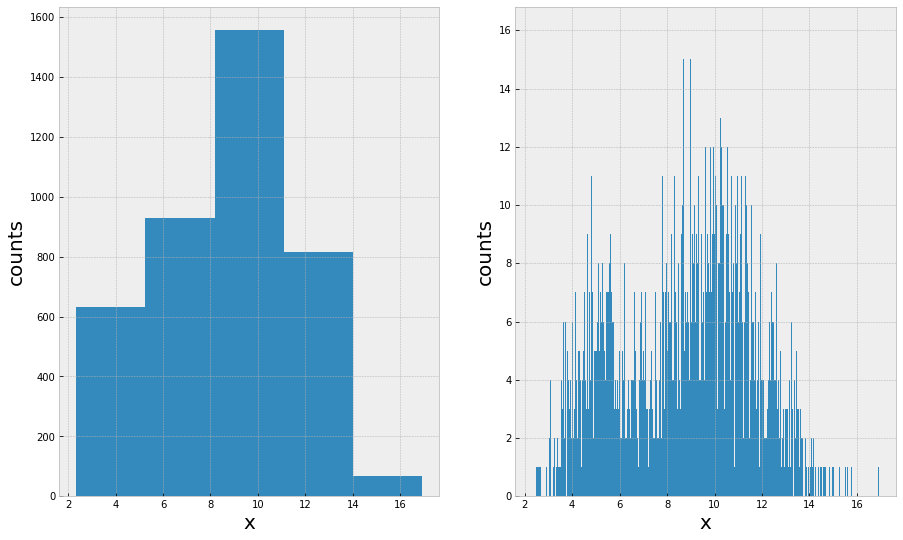

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15, 9))
axes[0].hist(data, bins = 5)
axes[0].set_xlabel("x")
axes[0].set_ylabel("counts")

axes[1].hist(data, bins = 1000)
axes[1].set_xlabel("x")
axes[1].set_ylabel("counts")

plt.show()

Which one of the 2 binning is correct?

### Error of a bin

Each bin of a histogram has associated an error. This error can be derived from the binomial distribution. Indeed, we can see the process of an event falling into a bin (or not) as a binomial event. The probability of having $k$ success, or k events falling in a bin should therefore follow the binomial distribution:

$$P(k; n, p) = {n \choose k} p^k(1-p)^{n-k}$$

where $n$ are the total number of events in the sample and $p$ is the probability to fall into a given bin. This probability is unknown, but I could estimate from the histogram itself. For a given bin $i$, if I have $n_i$ events inside a bin $i$ then I can approximate the probability of falling into that bin as the ratio of events inside this bin, and the total number of events:

$$p\simeq \frac{n_i}{n}$$

In this case the mean of the binomial distribution for that particular bin $i$ can be written as:

$$\mu_i = n\cdot p \equiv n_i$$ 
In other words, the mean of the binomial distribution of each bin, is the bin content $n_i$. I can do the same for the variance:

$$\sigma_i = \sqrt{np(1-p)} = \sqrt{n\frac{n_i}{n}(1 -\frac{ni}{n})} = \sqrt{n_i} $$

Et voilá, I arrived at the conclusion that distribution of events inside a bin, should follow a binomial distribution with mean equal to the number of events inside a bin, and a dispersion of squared root of that number!

With this knowledge is now clear that from the plots above the one with 5 bins the fine structure of the data distribution is lost (too small relative errors), while with 1000 bins, heights of individual bins change more than the size of the bin errors (sampling error).



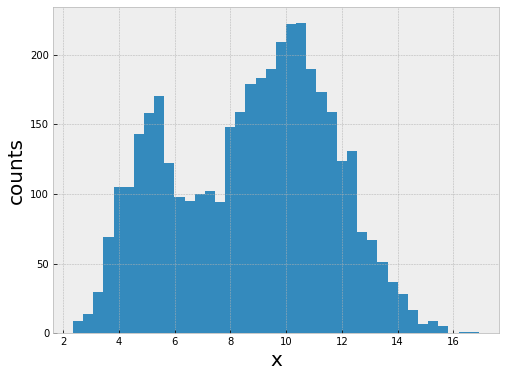

In [8]:

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.hist(data, bins = 40)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()



I can in principle also use different binning for different regions of a histrogram.

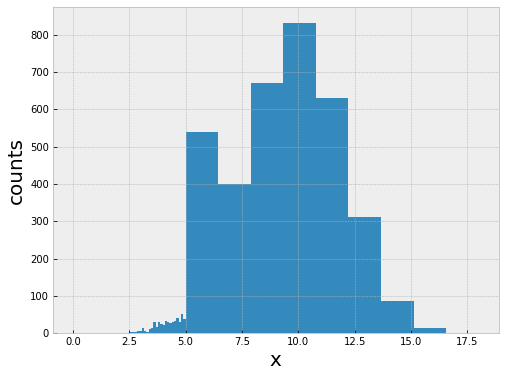

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=True),
                                     np.linspace(5,18, 10))), 
        density=False)
ax.set_xlabel("x")
ax.set_ylabel("counts")
plt.show()

The method matplotlib.hist returns as well the bin_edges, the heights of the bins and an array of objects called patches, which represent the color, geometry, etc. of the bin representation.


### Normalization of histograms

As default histograms are representation of occourence ie, in their y-axis they show $n_i$ which is just the number of events inside that bin. However, histograms can also be used to represent a density distribution. In this case histograms need to be normalized. Normalizing a histogram means divinding each bin by the total number and the binwidth, ie:

$$ n_i \rightarrow \frac{n_i}{\Delta x n} $$

since

$$\lim_{n\rightarrow \infty, \Delta x \rightarrow 0} \frac{n_i}{n \Delta x} \equiv f(x)$$

and therefore the normalization  goes as:

$$\int_{-\infty}^{\infty} f(x) {\rm d} x = 1 \rightarrow \sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1$$

The ```ax.hist``` method can already do the normalized histogram. It is called ```density``` and it divides each bin by the total number and the bin_width:

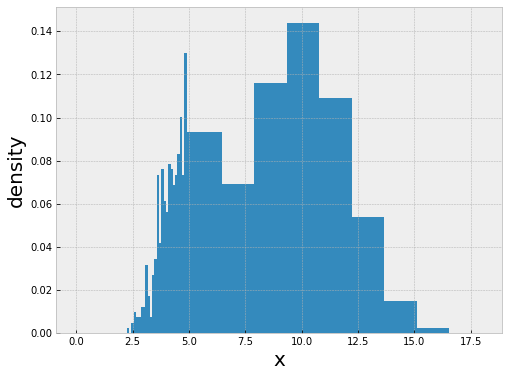

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
bin_edges, hist, patches = ax.hist(data, bins = np.concatenate((np.linspace(0, 5, 50,
                                               endpoint=True),
                                     np.linspace(5,18, 10))), 
        density=True)
ax.set_xlabel("x")
ax.set_ylabel("density")
plt.show()

### Working without plotting

So far we used ``matplotlib.hist`` to create the historgrams. Sometimes you only need to access the information of the histograms without plotting them. In that case we can use ``numpy.histogram`` method which returns the same information as ``matplotlib.hist`` but without the patches:


In [12]:
hist, bin_edges = np.histogram(data, bins= 40)

print (hist)
print (bin_edges)

[  9  14  30  69 105 105 143 158 170 122  98  95 100 102  94 148 159 179
 183 190 209 222 223 190 173 159 124 131  73  67  51  37  28  17   7   9
   5   0   1   1]
[ 2.34647448  2.71064879  3.0748231   3.43899741  3.80317172  4.16734603
  4.53152034  4.89569465  5.25986896  5.62404327  5.98821758  6.35239189
  6.7165662   7.08074051  7.44491482  7.80908913  8.17326344  8.53743774
  8.90161205  9.26578636  9.62996067  9.99413498 10.35830929 10.7224836
 11.08665791 11.45083222 11.81500653 12.17918084 12.54335515 12.90752946
 13.27170377 13.63587808 14.00005239 14.3642267  14.72840101 15.09257532
 15.45674963 15.82092394 16.18509825 16.54927256 16.91344687]


In [13]:
print (hist.size)
print (bin_edges.size)

40
41


Note that the bin_edges have an element more than the bin heights since it gives the overflow bin_edge. Also note that numpy returns the bin_edges and not the bin centers nor the bin widths. I can calulate those easily:


In [14]:
binwidths = np.diff(bin_edges)

print (binwidths)
print (binwidths.size)

[0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431 0.36417431
 0.36417431 0.36417431 0.36417431 0.36417431]
40


In [15]:
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2.
print (bin_centers)
print (bin_centers.size)

[ 2.52856163  2.89273594  3.25691025  3.62108456  3.98525887  4.34943318
  4.71360749  5.0777818   5.44195611  5.80613042  6.17030473  6.53447904
  6.89865335  7.26282766  7.62700197  7.99117628  8.35535059  8.7195249
  9.08369921  9.44787352  9.81204783 10.17622214 10.54039645 10.90457076
 11.26874507 11.63291938 11.99709369 12.361268   12.72544231 13.08961662
 13.45379093 13.81796524 14.18213955 14.54631386 14.91048817 15.27466248
 15.63883679 16.0030111  16.36718541 16.73135972]
40


In [16]:
hist, bin_edges = np.histogram(data, bins= 40, density = True)

print (np.sum(hist))


2.7459377908663045


Note that the sum is not 1. You need to multiply by the bin width to make:

$$\sum_i^{k} \frac{n_i}{n \Delta x} \Delta x = 1 $$

In [17]:
bin_width = np.diff(bin_edges)[0]

print (np.sum(hist)*bin_width)

1.0


Now I have all these series of heights and edges, how can I plot this without going back to ```plt.hist```?

Text(0, 0.5, 'density')

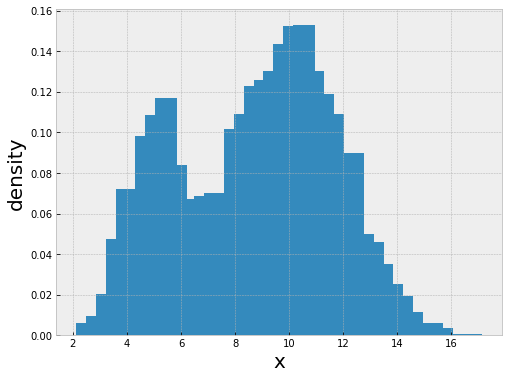

In [18]:

bin_centers = bin_edges[:-1] + bin_width/2.


fig, ax = plt.subplots(figsize=(8,6))
ax.bar(bin_centers, hist)
ax.set_xlabel("x")
ax.set_ylabel("density")